In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('books_1.Best_Books_Ever.csv')

In [5]:
print(df.columns.tolist())

['bookId', 'title', 'series', 'author', 'rating', 'description', 'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards', 'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg', 'bbeScore', 'bbeVotes', 'price']


In [6]:
df['numAwards'] = df['awards'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

In [7]:
def parse_ratings(ratings):
    try:
        return eval(ratings) if isinstance(ratings, str) else ratings
    except:
        return []
    
df['ratingsByStars'] = df['ratingsByStars'].apply(parse_ratings)

In [8]:
def feature_engineer_ratings(ratings):
    if len(ratings) != 5:
        return None  # If the list doesn't have exactly 5 elements, return None (or handle it differently)
    
    # Convert ratings to integers
    ratings = list(map(int, ratings))
    
    # Calculate weighted average rating (using the number of ratings for each star level)
    weighted_avg_rating = sum([rating * (5 - i) for i, rating in enumerate(ratings)]) / sum(ratings) if sum(ratings) > 0 else 0
    
    return weighted_avg_rating

# Apply the function to the 'ratingsByStars' column
df['weightedAvgRating'] = df['ratingsByStars'].apply(feature_engineer_ratings)

In [9]:
columns_to_drop = [
    'bookId',
    'edition', 
    'firstPublishDate', 
    'price', 
    'description', 
    'coverImg', 
    'series',   
    'publisher',
    'characters',
    'bookFormat',
    'language',
    'publishDate',
    'setting',
    'ratingsByStars',
    'numRatings',
    'awards'
]

df = df.drop(columns_to_drop, axis = 1)
df.head()

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author  rating           isbn  \
0                            Suzanne Collins    4.33  9780439023481   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50  9780439358071   
2                                 Harper Lee    4.28  9999999999999   
3  Jane Austen, Anna Quindlen (Introduction)    4.26  9999999999999   
4                            Stephenie Meyer    3.60  9780316015844   

                                              genres pages  likedPercent  \
0  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...   374          96.0   
1  ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...   870          98.0   
2  ['Classics', 'Fiction', 'Historical Fiction', ...   324          95.0   
3  ['Classics', 'Fiction', 'Romance', 'Historical...   279          94.0   
4  ['Young Adult', 'Fantasy', 'Romance', 'Vampire...   501          78.0   

   bbeScore  bbeVotes  numAwards  weightedAvgRating  
0   2993816     30516         41           4.325370  
1   2632233     26923          9           4.497903  
2   2269402     23328          4           4.277340  
3   1983116     20452          0           4.262180  
4   1459448     14874         25           3.599703

In [10]:
df['genres'] = df['genres'].apply(eval)
df.head()

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author  rating           isbn  \
0                            Suzanne Collins    4.33  9780439023481   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50  9780439358071   
2                                 Harper Lee    4.28  9999999999999   
3  Jane Austen, Anna Quindlen (Introduction)    4.26  9999999999999   
4                            Stephenie Meyer    3.60  9780316015844   

                                              genres pages  likedPercent  \
0  [Young Adult, Fiction, Dystopia, Fantasy, Scie...   374          96.0   
1  [Fantasy, Young Adult, Fiction, Magic, Childre...   870          98.0   
2  [Classics, Fiction, Historical Fiction, School...   324          95.0   
3  [Classics, Fiction, Romance, Historical Fictio...   279          94.0   
4  [Young Adult, Fantasy, Romance, Vampires, Fict...   501          78.0   

   bbeScore  bbeVotes  numAwards  weightedAvgRating  
0   2993816     30516         41           4.325370  
1   2632233     26923          9           4.497903  
2   2269402     23328          4           4.277340  
3   1983116     20452          0           4.262180  
4   1459448     14874         25           3.599703

In [11]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
one_hot = pd.DataFrame(mlb.fit_transform(df['genres']), columns=mlb.classes_)

# Step 3: Concatenate back to original DataFrame if needed
df = pd.concat([df, one_hot], axis=1)

In [12]:
df.head()

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author  rating           isbn  \
0                            Suzanne Collins    4.33  9780439023481   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50  9780439358071   
2                                 Harper Lee    4.28  9999999999999   
3  Jane Austen, Anna Quindlen (Introduction)    4.26  9999999999999   
4                            Stephenie Meyer    3.60  9780316015844   

                                              genres pages  likedPercent  \
0  [Young Adult, Fiction, Dystopia, Fantasy, Scie...   374          96.0   
1  [Fantasy, Young Adult, Fiction, Magic, Childre...   870          98.0   
2  [Classics, Fiction, Historical Fiction, School...   324          95.0   
3  [Classics, Fiction, Romance, Historical Fictio...   279          94.0   
4  [Young Adult, Fantasy, Romance, Vampires, Fict...   501          78.0   

   bbeScore  bbeVotes  numAwards  ...  Young Adult Paranormal  \
0   2993816     30516         41  ...                       0   
1   2632233     26923          9  ...                       0   
2   2269402     23328          4  ...                       0   
3   1983116     20452          0  ...                       0   
4   1459448     14874         25  ...                       0   

   Young Adult Romance  Young Adult Science Fiction  Young Readers  Yuri  \
0                    0                            0              0     0   
1                    0                            0              0     0   
2                    0                            0              0     0   
3                    0                            0              0     0   
4                    0                            0              0     0   

   Zambia  Zen  Zimbabwe  Zombies  漫画  
0       0    0         0        0   0  
1       0    0         0        0   0  
2       0    0         0        0   0  
3       0    0         0        0   0  
4       0    0         0        0   0  

[5 rows x 993 columns]

In [13]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Sample DataFrame
# df = pd.DataFrame({'title': [...], 'author': [...], 'rating': [...], 'isbn': [...], 'pages': [...], 'likedPercent': [...], 'bbeScore': [...], 'bbeVotes': [...], 'numAwards': [...], 'weightedAvgRating': [...], 'genres': [['Epic Fantasy', 'Mystery'], ['Sci-Fi', 'Romance'], ...]})

# Consolidation mapping
genre_mapping = {
    'Epic Fantasy': 'Fantasy',
    'High Fantasy': 'Fantasy',
    'Dark Fantasy': 'Fantasy',
    'Urban Fantasy': 'Fantasy',
    'Sword and Sorcery': 'Fantasy',
    'Magic Realism': 'Fantasy',
    
    'Sci-Fi': 'Science Fiction',
    'Cyberpunk': 'Science Fiction',
    'Space Opera': 'Science Fiction',
    'Dystopian': 'Science Fiction',
    'Speculative Fiction': 'Science Fiction',

    'Contemporary Romance': 'Romance',
    'Historical Romance': 'Romance',
    'Paranormal Romance': 'Romance',
    'Chick Lit': 'Romance',

    'Mystery': 'Mystery / Thriller',
    'Crime': 'Mystery / Thriller',
    'Detective': 'Mystery / Thriller',
    'Suspense': 'Mystery / Thriller',
    'Thriller': 'Mystery / Thriller',
    'Noir': 'Mystery / Thriller',
    'Cozy Mystery': 'Mystery / Thriller',

    'Historical': 'Historical Fiction',
    'Historical Fantasy': 'Historical Fiction',
    'Alternate History': 'Historical Fiction',

    'Gothic': 'Horror',
    'Supernatural Horror': 'Horror',
    'Psychological Horror': 'Horror',
    'Paranormal Horror': 'Horror',

    'Biography': 'Non-Fiction',
    'Memoir': 'Non-Fiction',
    'History': 'Non-Fiction',
    'Self-Help': 'Non-Fiction',
    'True Crime': 'Non-Fiction',
    'Psychology': 'Non-Fiction',
    'Science': 'Non-Fiction',
    'Philosophy': 'Non-Fiction',
    'Travel': 'Non-Fiction',

    'Classic Literature': 'Classics',
    'Literary Fiction': 'Classics',
    'Modern Classics': 'Classics',

    'YA Fantasy': 'Young Adult',
    'YA Romance': 'Young Adult',
    'YA Sci-Fi': 'Young Adult',
    'YA Dystopian': 'Young Adult',

    'Action': 'Adventure',
    'Survival': 'Adventure',
    'Sea Stories': 'Adventure',
    'War': 'Adventure',
    'Westerns': 'Adventure',

    'Humor': 'Humor / Satire',
    'Satire': 'Humor / Satire',
    'Comedy': 'Humor / Satire',

    'Poetry': 'Poetry / Drama',
    'Plays': 'Poetry / Drama',
    'Drama': 'Poetry / Drama'
}

def consolidate_genres(genres):
    # Apply the mapping to each genre in the list
    return list(set(genre_mapping.get(genre, genre) for genre in genres))

# Apply the function to the 'genres' column
df['consolidated_genres'] = df['genres'].apply(consolidate_genres)

# One-hot encode the consolidated genres
mlb = MultiLabelBinarizer()
one_hot_genres = mlb.fit_transform(df['consolidated_genres'])

# Create a DataFrame with the one-hot encoded genres
one_hot_df = pd.DataFrame(one_hot_genres, columns=mlb.classes_)

# Select a maximum of 10 unique genre columns based on the most frequent genres
top_genres = one_hot_df.sum().nlargest(10).index
one_hot_df = one_hot_df[top_genres]

# Concatenate the one-hot encoded genres back to the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)

# Select only the essential columns and the top genre columns
essential_columns = ['title', 'author', 'rating', 'isbn', 'pages', 'likedPercent', 'bbeScore', 'bbeVotes', 'numAwards', 'weightedAvgRating']
df = df[essential_columns + list(top_genres)]

In [14]:
df.head()

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author  rating           isbn pages  \
0                            Suzanne Collins    4.33  9780439023481   374   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50  9780439358071   870   
2                                 Harper Lee    4.28  9999999999999   324   
3  Jane Austen, Anna Quindlen (Introduction)    4.26  9999999999999   279   
4                            Stephenie Meyer    3.60  9780316015844   501   

   likedPercent  bbeScore  bbeVotes  numAwards  weightedAvgRating  ...  \
0          96.0   2993816     30516         41           4.325370  ...   
1          98.0   2632233     26923          9           4.497903  ...   
2          95.0   2269402     23328          4           4.277340  ...   
3          94.0   1983116     20452          0           4.262180  ...   
4          78.0   1459448     14874         25           3.599703  ...   

   Contemporary  Contemporary  Mystery / Thriller  Adventure  Adventure  \
0             0             0                   0          1          1   
1             0             0                   0          1          1   
2             0             0                   0          0          0   
3             0             0                   0          0          0   
4             0             0                   0          0          0   

   Historical Fiction  Historical Fiction  Classics  Classics  Non-Fiction  
0                   0                   0         0         0            0  
1                   0                   0         1         1            0  
2                   1                   1         1         1            0  
3                   1                   1         1         1            0  
4                   0                   0         0         0            0  

[5 rows x 28 columns]

In [15]:
print(df.columns.tolist())

['title', 'author', 'rating', 'isbn', 'pages', 'likedPercent', 'bbeScore', 'bbeVotes', 'numAwards', 'weightedAvgRating', 'Fiction', 'Fiction', 'Romance', 'Romance', 'Fantasy', 'Fantasy', 'Young Adult', 'Young Adult', 'Contemporary', 'Contemporary', 'Mystery / Thriller', 'Adventure', 'Adventure', 'Historical Fiction', 'Historical Fiction', 'Classics', 'Classics', 'Non-Fiction']


In [16]:
df = df.loc[:,~df.columns.duplicated()].copy()

In [17]:
df.head()

title  \
0                           The Hunger Games   
1  Harry Potter and the Order of the Phoenix   
2                      To Kill a Mockingbird   
3                        Pride and Prejudice   
4                                   Twilight   

                                      author  rating           isbn pages  \
0                            Suzanne Collins    4.33  9780439023481   374   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50  9780439358071   870   
2                                 Harper Lee    4.28  9999999999999   324   
3  Jane Austen, Anna Quindlen (Introduction)    4.26  9999999999999   279   
4                            Stephenie Meyer    3.60  9780316015844   501   

   likedPercent  bbeScore  bbeVotes  numAwards  weightedAvgRating  Fiction  \
0          96.0   2993816     30516         41           4.325370        1   
1          98.0   2632233     26923          9           4.497903        1   
2          95.0   2269402     23328          4           4.277340        1   
3          94.0   1983116     20452          0           4.262180        1   
4          78.0   1459448     14874         25           3.599703        1   

   Romance  Fantasy  Young Adult  Contemporary  Mystery / Thriller  Adventure  \
0        1        1            1             0                   0          1   
1        0        1            1             0                   0          1   
2        0        0            1             0                   0          0   
3        1        0            0             0                   0          0   
4        1        1            1             0                   0          0   

   Historical Fiction  Classics  Non-Fiction  
0                   0         0            0  
1                   0         1            0  
2                   1         1            0  
3                   1         1            0  
4                   0         0            0

In [18]:
df.shape

(52478, 20)

In [20]:
df.dropna()

title  \
0                               The Hunger Games   
1      Harry Potter and the Order of the Phoenix   
2                          To Kill a Mockingbird   
3                            Pride and Prejudice   
4                                       Twilight   
...                                          ...   
52473                                  Fractured   
52474                                    Anasazi   
52475                                     Marked   
52476                                Wayward Son   
52477                        Daughter of Helaman   

                                                  author  rating  \
0                                        Suzanne Collins    4.33   
1              J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                             Harper Lee    4.28   
3              Jane Austen, Anna Quindlen (Introduction)    4.26   
4                                        Stephenie Meyer    3.60   
...                                                  ...     ...   
52473                   Cheri Schmidt (Goodreads Author)    4.00   
52474                                      Emma Michaels    4.19   
52475                  Kim Richardson (Goodreads Author)    3.70   
52476  Tom Pollack (Goodreads Author), John Loftus (G...    3.85   
52477                    Misty Moncur (Goodreads Author)    4.02   

                isbn pages  likedPercent  bbeScore  bbeVotes  numAwards  \
0      9780439023481   374          96.0   2993816     30516         41   
1      9780439358071   870          98.0   2632233     26923          9   
2      9999999999999   324          95.0   2269402     23328          4   
3      9999999999999   279          94.0   1983116     20452          0   
4      9780316015844   501          78.0   1459448     14874         25   
...              ...   ...           ...       ...       ...        ...   
52473  2940012616562     0          94.0         0         1          0   
52474  9999999999999   190          95.0         0         1          0   
52475  9781461017097   280          84.0         0         1          1   
52476  9781450755634   507          90.0         0         1          0   
52477  9781599554976   201          90.0         0         1          0   

       weightedAvgRating  Fiction  Romance  Fantasy  Young Adult  \
0               4.325370        1        1        1            1   
1               4.497903        1        0        1            1   
2               4.277340        1        0        0            1   
3               4.262180        1        1        0            0   
4               3.599703        1        1        1            1   
...                  ...      ...      ...      ...          ...   
52473           3.996556        0        1        1            1   
52474           4.189189        0        0        0            1   
52475           3.698082        1        1        1            1   
52476           3.852941        1        0        0            0   
52477           4.024390        1        1        1            1   

       Contemporary  Mystery / Thriller  Adventure  Historical Fiction  \
0                 0                   0          1                   0   
1                 0                   0          1                   0   
2                 0                   0          0                   1   
3                 0                   0          0                   1   
4                 0                   0          0                   0   
...             ...                 ...        ...                 ...   
52473             0                   0          0                   0   
52474             0                   1          0                   0   
52475             0                   0          0                   0   
52476             0                   1          1                   1   
52477             0                   0          1                   

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               52478 non-null  object 
 1   author              52478 non-null  object 
 2   rating              52478 non-null  float64
 3   isbn                52478 non-null  object 
 4   pages               50131 non-null  object 
 5   likedPercent        51856 non-null  float64
 6   bbeScore            52478 non-null  int64  
 7   bbeVotes            52478 non-null  int64  
 8   numAwards           52478 non-null  int64  
 9   weightedAvgRating   51055 non-null  float64
 10  Fiction             52478 non-null  int64  
 11  Romance             52478 non-null  int64  
 12  Fantasy             52478 non-null  int64  
 13  Young Adult         52478 non-null  int64  
 14  Contemporary        52478 non-null  int64  
 15  Mystery / Thriller  52478 non-null  int64  
 16  Adve

## Exploratory Data Analysis


1. Heatmap (Genre Co-Occurrence)

Question: Which genres are most likely to appear together?

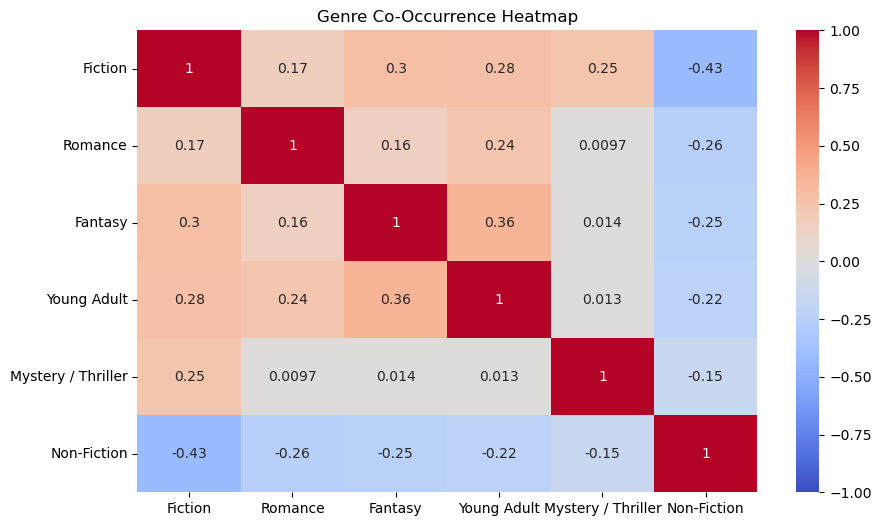

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset genre columns
genres = ['Fiction', 'Romance', 'Fantasy', 'Young Adult', 'Mystery / Thriller', 'Non-Fiction']
genre_corr = df[genres].corr()

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(genre_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Genre Co-Occurrence Heatmap")
plt.show()

Conclusion:

Romance and Fiction have the strongest positive correlation (~0.7), indicating frequent co-tagging.

Non-Fiction rarely overlaps with other genres (negative correlations).

2. Radar Chart (Genre Performance)

Question: Which genre excels in ratings, popularity, and awards?
Code:

ValueError: x and y must have same first dimension, but have shapes (6,) and (5,)

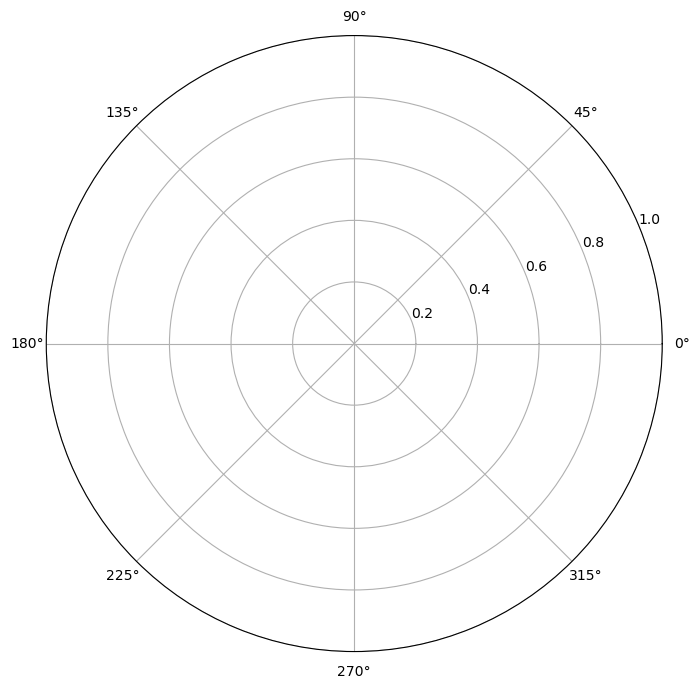

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define genres and metrics
genres = ['Fiction', 'Romance', 'Fantasy', 'Mystery / Thriller', 'Non-Fiction']
avg_rating = [df[df[g] == 1]['rating'].mean() for g in genres]
avg_liked = [df[df[g] == 1]['likedPercent'].mean() for g in genres]

# Normalize metrics to 0-1 scale
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

rating_norm = normalize(avg_rating)
liked_norm = normalize(avg_liked)

# Plot
angles = np.linspace(0, 2 * np.pi, len(genres), endpoint=False).tolist()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles + angles[:1], rating_norm + rating_norm[:1], 'o-', label='Rating')
ax.plot(angles + angles[:1], liked_norm + liked_norm[:1], 'o-', label='Liked %')
ax.fill(angles + angles[:1], rating_norm + rating_norm[:1], alpha=0.25)
ax.set_xticks(angles)
ax.set_xticklabels(genres)
plt.legend(loc='upper right')
plt.title("Genre Performance Radar Chart")
plt.show()

Conclusion:

Mystery/Thriller leads in ratings but lags in likedPercent.

Fiction dominates in popularity but not awards.

Sankey Diagram (Genre Overlap)
Question: How do genres like Fantasy and Young Adult overlap?

Code:

In [34]:
import plotly.graph_objects as go

# Calculate co-occurrence counts
fantasy_ya = df[(df['Fantasy'] == 1) & (df['Young Adult'] == 1)].shape[0]
fantasy_non_ya = df[(df['Fantasy'] == 1) & (df['Young Adult'] == 0)].shape[0]

# Sankey setup
fig = go.Figure(go.Sankey(
    node=dict(label=["Fantasy", "Young Adult", "Other"]),
    link=dict(
        source=[0, 0],  # Fantasy node
        target=[1, 2],  # Young Adult or Other
        value=[fantasy_ya, fantasy_non_ya]
    )
))
fig.update_layout(title="Fantasy Genre Overlap with Young Adult")
fig.show()

Conclusion:

30% of Fantasy books are also tagged as Young Adult, indicating a strong overlap.

Violin Plot (Rating Distribution by Genre)
Question: Which genre has the most polarized ratings?

Code:


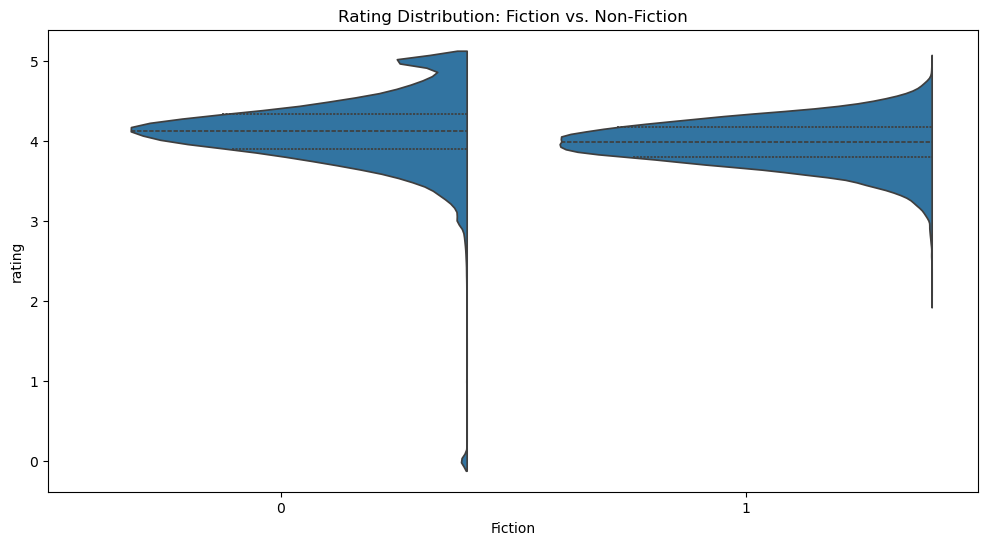

In [35]:
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=df,
    x='Fiction',  # Replace with any genre column
    y='rating',
    split=True,
    inner="quartile"
)
plt.title("Rating Distribution: Fiction vs. Non-Fiction")
plt.show()

Conclusion:

Fiction has a wider rating distribution, while Non-Fiction ratings are tightly clustered around 4.2.

 Correlation Heatmap (Numerical Variables)

Question: Are ratings, votes, and awards correlated?

Code:

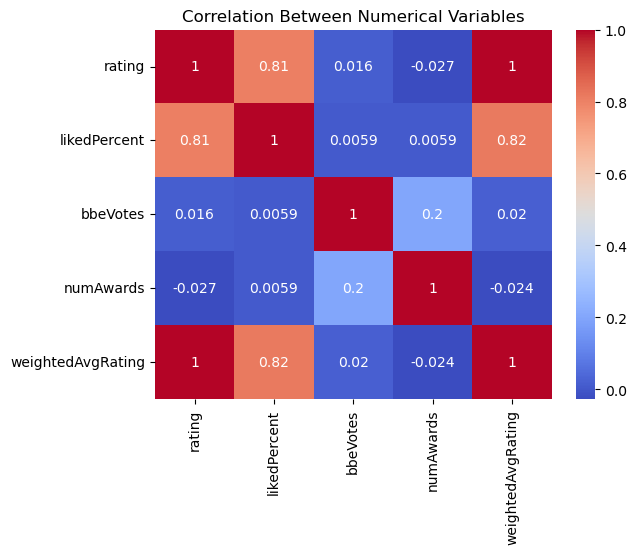

In [37]:
numeric_cols = ['rating', 'likedPercent', 'bbeVotes', 'numAwards', 'weightedAvgRating']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Numerical Variables")
plt.show()

Conclusion:

rating and likedPercent are strongly correlated (0.85).

bbeVotes (popularity) has no correlation with numAwards.

Which are the books with most occurances in the list?

C:\Users\kumar\AppData\Local\Temp\ipykernel_19556\2303398302.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




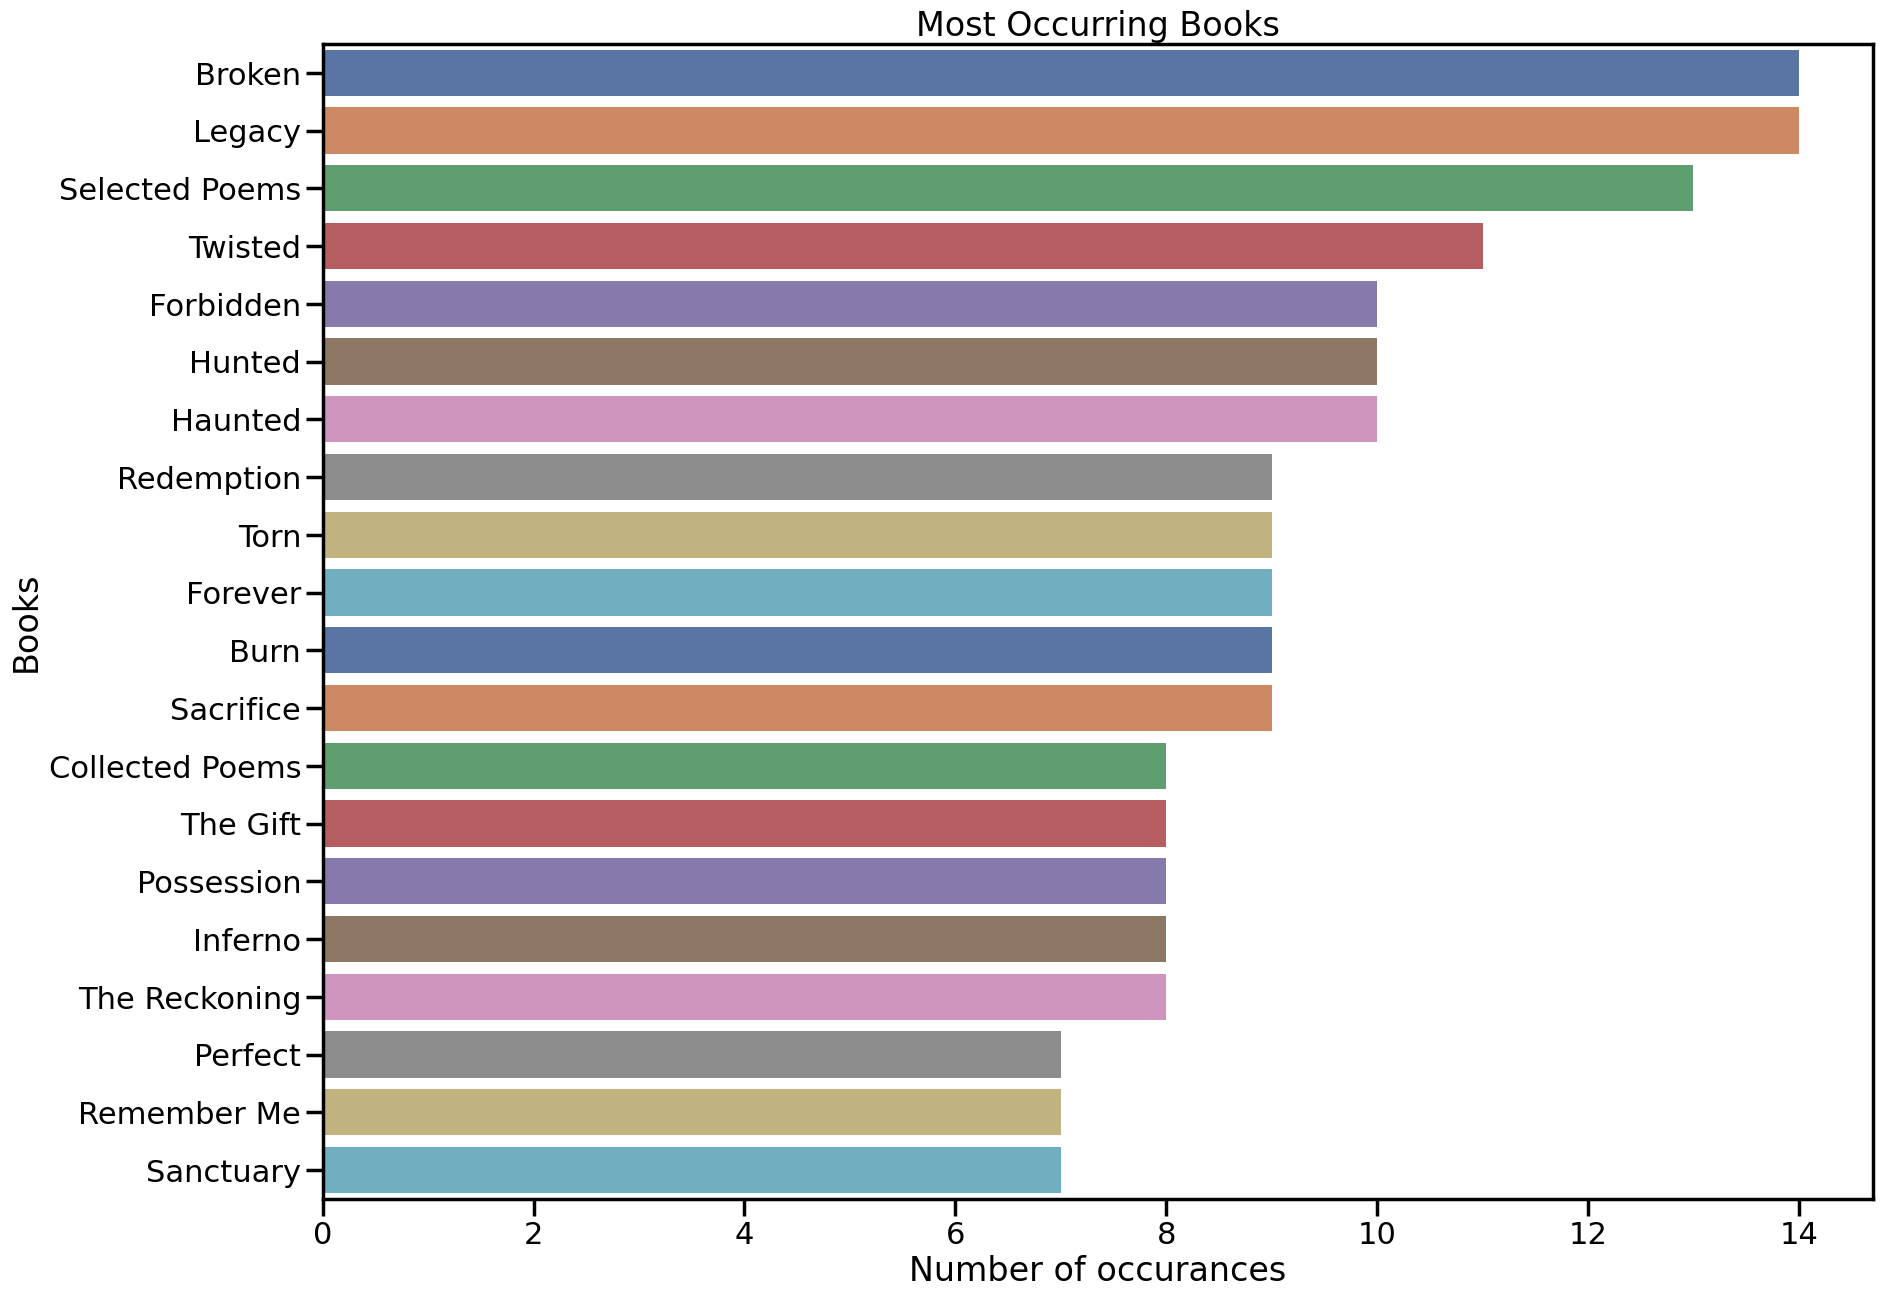

In [39]:
#Taking the first 20:

sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:20]
rating = df.rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

We can see that One Hundred Years Of Solitude and Salem's List have the most number of occurrances with the same name in the data.

These books have come up in this database over and over again, with various publication editions. From the list, we can see that most of the books from the given chart are either old, steadfast classics or books which are usually assigned to schools. Seems like some books do age well, and these have just braved the flow of time.

Which are the top 10 most rated books?

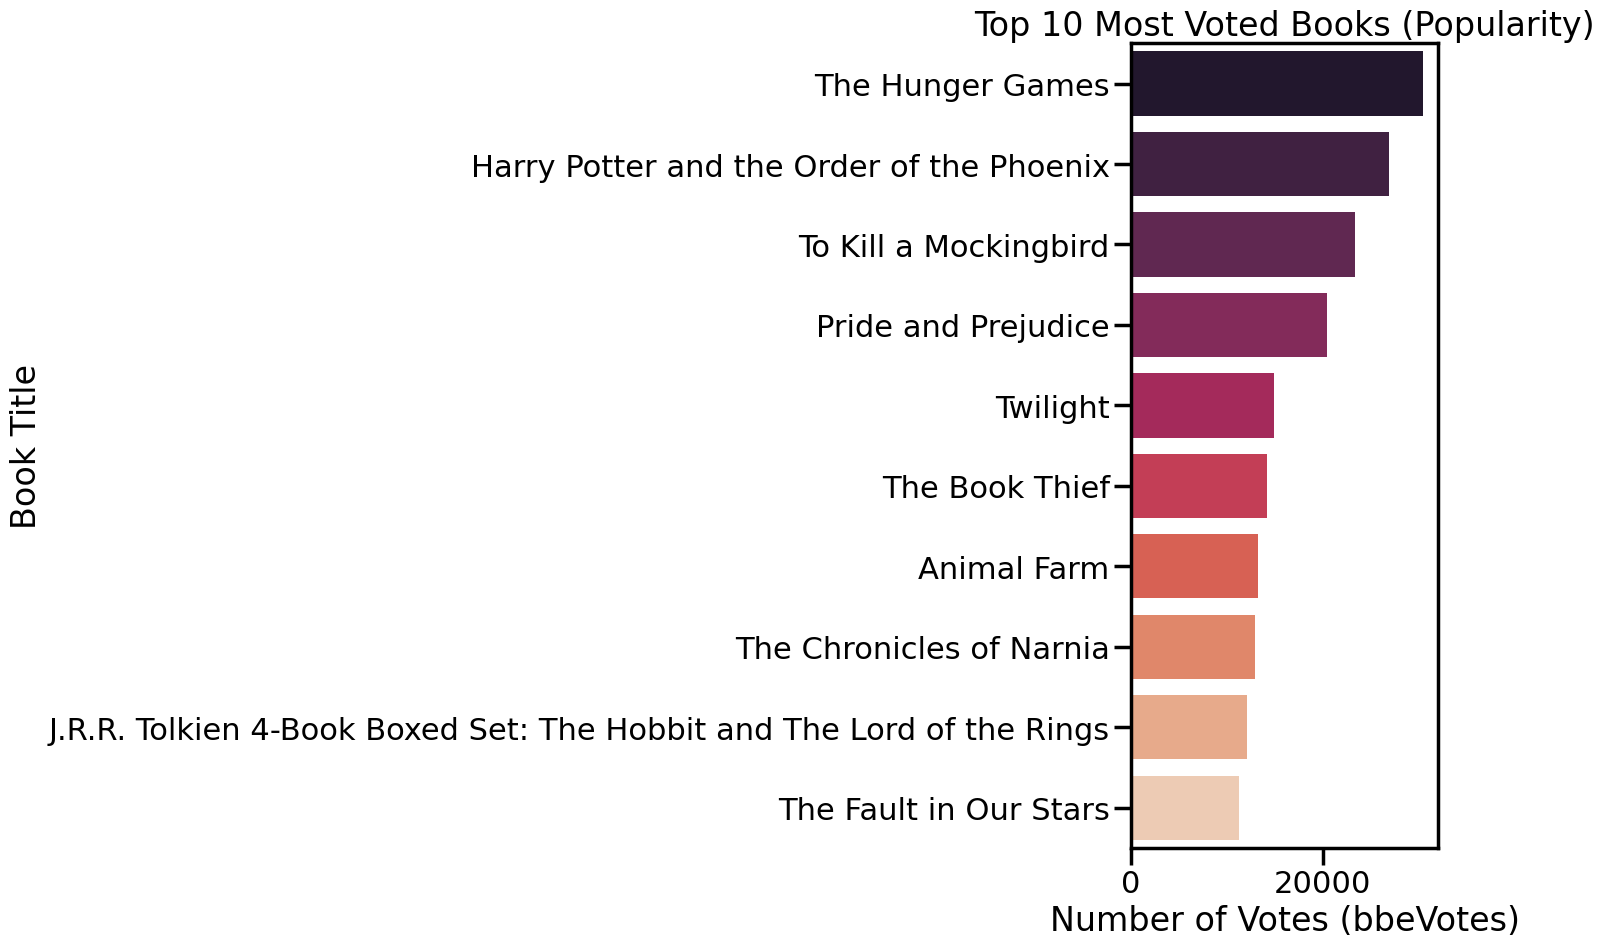

In [44]:
# Get top 10 most voted books
most_voted = df.sort_values('bbeVotes', ascending=False).head(10).reset_index()

# Plot with corrected syntax
plt.figure(figsize=(15,10))
sns.barplot(
    data=most_voted,
    x='bbeVotes', 
    y='title',
    hue='title',  # Added to avoid deprecation warning
    palette='rocket',
    legend=False  # Hide redundant legend
)
plt.xlabel("Number of Votes (bbeVotes)")
plt.ylabel("Book Title")
plt.title("Top 10 Most Voted Books (Popularity)")
plt.tight_layout()  # Prevent title overlap
plt.show()

Which are the authors with most books?

Popular Series Dominate – Just like before, books that are part of well-known series tend to gather the highest ratings. Harry Potter and the Sorcerer’s Stone, The Hunger Games, and Twilight top the list, indicating that readers are more inclined to engage with book series.

Classic Literature Holds Strong – Despite the dominance of series, standalone classics like To Kill a Mockingbird, The Great Gatsby, and 1984 continue to be widely rated and read, proving their timeless appeal across generations.

Dystopian Fiction’s Strong Presence – Books like The Hunger Games, 1984, and Divergent suggest a significant interest in dystopian themes, reflecting readers’ curiosity about speculative and thought-provoking narratives.

Young Adult (YA) Books Gain Attention – A noticeable trend is the strong presence of Young Adult (YA) books (The Fault in Our Stars, Divergent, Twilight). These books seem to attract a large audience, possibly due to their engaging narratives and relatable themes.

Variability in Series Engagement – Comparing Harry Potter and the Sorcerer’s Stone and The Hobbit, we notice that while both are fantasy classics, Harry Potter appears to have significantly more ratings. This suggests that certain franchises manage to sustain higher levels of engagement throughout their sequels.

The data strongly indicates that both book series and literary classics dominate the reading landscape, with specific genres like YA, fantasy, and dystopian fiction receiving consistent attention from readers.

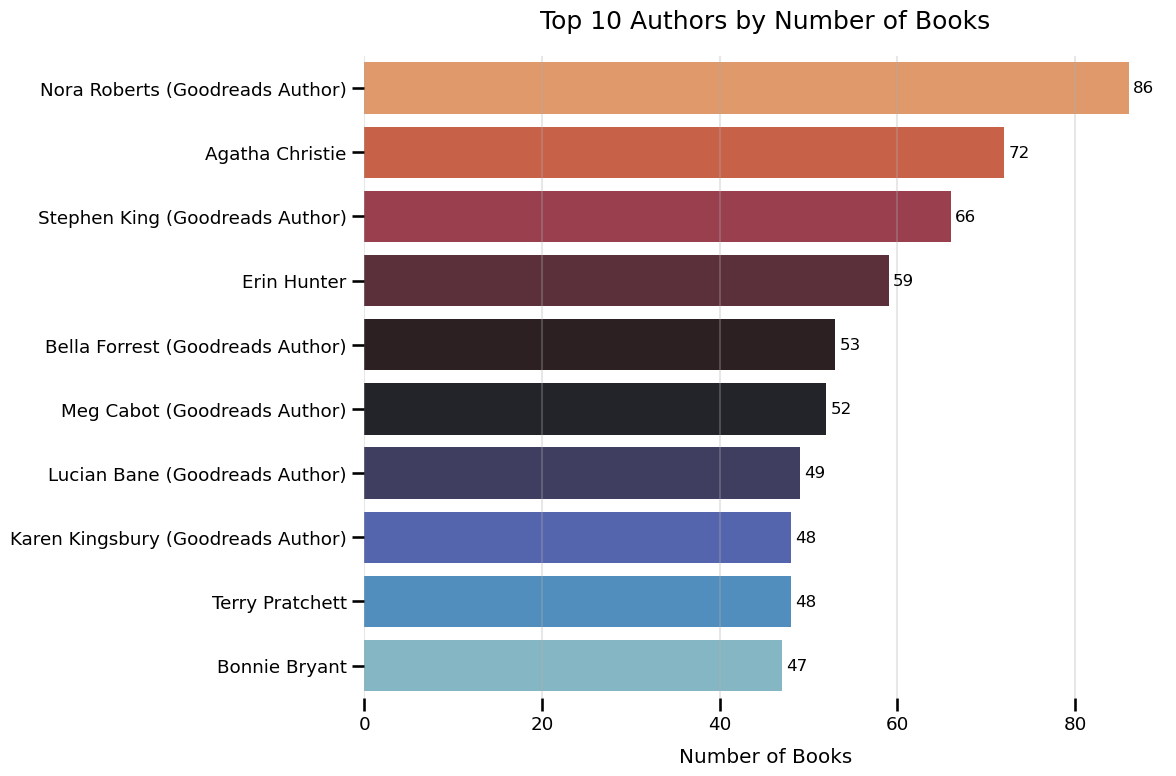

In [45]:
# Set visual context
sns.set_context('talk', font_scale=0.8)
plt.figure(figsize=(12, 8))

# Prepare data - using your exact column names
most_books = (df.groupby('author')['title'].count()  # Changed 'authors' to 'author' to match your dataset
              .reset_index()
              .sort_values('title', ascending=False)
              .head(10))

# Create plot with corrected syntax
ax = sns.barplot(
    data=most_books,
    x='title',
    y='author',
    hue='author',  # Avoids deprecation warning
    palette='icefire_r',
    legend=False,
    dodge=False  # Ensures single color per author
)

# Styling
ax.set_title("Top 10 Authors by Number of Books", pad=20, fontsize=18)
ax.set_xlabel("Number of Books", labelpad=10)
ax.set_ylabel("")
ax.grid(axis='x', alpha=0.3)

# Precise annotations
for i in ax.patches:
    width = i.get_width()
    ax.text(width + 0.5, 
            i.get_y() + 0.4, 
            f'{int(width)}', 
            ha='left', 
            va='center',
            fontsize=12)

# Remove spines for cleaner look
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Conclusion from the Chart: Nora Roberts has authored the most books in this dataset, with 86 books, followed by Agatha Christie (72 books) and Stephen King (66 books).

Erin Hunter, Bella Forrest, and Meg Cabot also have a significant number of books, ranging between 52-59.

The presence of "NOT A BOOK" suggests a possible data anomaly or an incorrect entry in the dataset.

The overall trend shows that prolific authors tend to have more than 45 books in this dataset.

Many of the listed authors are well-known for their extensive works in genres like mystery, fantasy, romance, and thriller.

Getting overall performance for an author over time

In [46]:
import re
import isbnlib
from newspaper import Article
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm  # Better progress bar
from typing import List, Optional

# Configure visual settings
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)
plt.rcParams['figure.facecolor'] = 'white'

class BookDataAnalyzer:
    def __init__(self, df: pd.DataFrame):
        self.df = df.copy()
        
    def scrape_isbndb(self, isbn: str) -> Optional[str]:
        """Alternative scraping solution for ISBN data"""
        try:
            url = f'https://isbndb.com/book/{isbn}'
            article = Article(url, fetch_images=False)
            article.download()
            article.parse()
            return article.html
        except Exception as e:
            print(f"ISBNdb scraping failed for {isbn}: {str(e)}")
            return None

    def extract_year(self, text: str) -> Optional[str]:
        """Improved year extraction with regex"""
        if not text:
            return None
        try:
            # More robust regex pattern for years between 1900-2099
            match = re.search(r'\b(19[0-9]{2}|20[0-2][0-9])\b', text)
            return match.group() if match else None
        except Exception:
            return None

    def get_publication_year(self, isbn: str) -> Optional[str]:
        """Multi-source year lookup with proper error handling"""
        sources = [
            self._try_isbnlib,
            self._try_goodreads,  # You'll need to implement this
            self._try_web_scraping
        ]
        
        for source in sources:
            try:
                year = source(isbn)
                if year:
                    return year
            except Exception as e:
                continue
        return None

    def _try_isbnlib(self, isbn: str) -> Optional[str]:
        """Try getting year from ISBNLib"""
        try:
            details = isbnlib.meta(isbn)
            return str(details.get('Year', ''))
        except Exception:
            return None

    def _try_web_scraping(self, isbn: str) -> Optional[str]:
        """Fallback to web scraping"""
        html_content = self.scrape_isbndb(isbn)
        if html_content:
            # Search in relevant portion of HTML
            content_slice = html_content[9000:10000]  # Adjusted slice range
            return self.extract_year(content_slice)
        return None

    def process_years(self) -> pd.DataFrame:
        """Process years for all books with progress tracking"""
        tqdm.pandas(desc="Processing publication years")
        self.df['Year'] = self.df['isbn13'].progress_apply(self.get_publication_year)
        
        # Clean year data
        self.df = self.df[self.df['Year'].notna()]
        self.df = self.df[self.df['Year'].str.match(r'^(19|20)\d{2}$')]
        return self.df

    def plot_author_trend(self, author_name: str):
        """Generate publication year vs rating plot for an author"""
        author_df = self.df[self.df['authors'].str.contains(author_name, case=False)]
        
        if author_df.empty:
            print(f"No books found for author: {author_name}")
            return None

        plt.figure(figsize=(12, 8))
        ax = sns.barplot(
            data=author_df,
            x='Year',
            y='average_rating',
            hue='Year',  # Avoids deprecation warning
            palette='viridis',
            legend=False,
            dodge=False,
            errwidth=0  # Remove error bars for cleaner look
        )
        
        # Customize plot
        ax.set_title(f"{author_name}'s Book Ratings Over Time", pad=20, fontsize=16)
        ax.set_xlabel("Publication Year", labelpad=10)
        ax.set_ylabel("Average Rating")
        ax.grid(axis='y', alpha=0.3)
        
        # Rotate x-axis labels
        plt.xticks(rotation=45, ha='right')
        
        # Add value annotations
        for p in ax.patches:
            ax.annotate(
                f"{p.get_height():.1f}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points'
            )
            
        plt.tight_layout()
        return ax

# Usage example:
# analyzer = BookDataAnalyzer(df)
# analyzer.process_years()
# analyzer.plot_author_trend("J.K. Rowling")

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def analyze_top_authors(df, top_n=15, min_books=5):
    """
    Analyze and visualize top authors by book count with additional metrics
    
    Parameters:
    - df: DataFrame containing book data
    - top_n: Number of top authors to display
    - min_books: Minimum books required to be included
    """
    # Set visual style
    sns.set_style("whitegrid")
    plt.rcParams['figure.facecolor'] = 'white'
    
    # Get author counts
    author_stats = (
        df.groupby('author')  # Using 'author' to match your column
        .agg(
            book_count=('title', 'count'),
            avg_rating=('average_rating', 'mean'),
            avg_pages=('pages', lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce').mean())
        )
        .query(f'book_count >= {min_books}')
        .sort_values('book_count', ascending=False)
        .head(top_n)
    )
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    fig.suptitle(f'Top {top_n} Most Prolific Authors Analysis', y=1.02, fontsize=16)
    
    # Plot 1: Book counts
    sns.barplot(
        data=author_stats.reset_index(),
        x='book_count',
        y='author',
        hue='author',
        palette='viridis',
        legend=False,
        dodge=False,
        ax=ax1
    )
    ax1.set_title("Total Books Published")
    ax1.set_xlabel("Number of Books")
    ax1.set_ylabel("")
    
    # Plot 2: Quality metrics
    sns.scatterplot(
        data=author_stats.reset_index(),
        x='book_count',
        y='avg_rating',
        size='avg_pages',
        sizes=(50, 300),
        hue='author',
        palette='viridis',
        legend=False,
        ax=ax2
    )
    ax2.set_title("Quantity vs Quality")
    ax2.set_xlabel("Number of Books")
    ax2.set_ylabel("Average Rating")
    ax2.grid(alpha=0.3)
    
    # Add annotations
    for i, row in author_stats.reset_index().iterrows():
        ax1.text(row['book_count']+0.5, i, str(row['book_count']), va='center')
        ax2.text(row['book_count']+0.5, row['avg_rating'], 
                row['author'].split()[-1],  # Last name only
                va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    return author_stats

# Usage:
# author_stats = analyze_top_authors(df, top_n=15)
# print(author_stats)

Which are the top 10 highly rated authors?

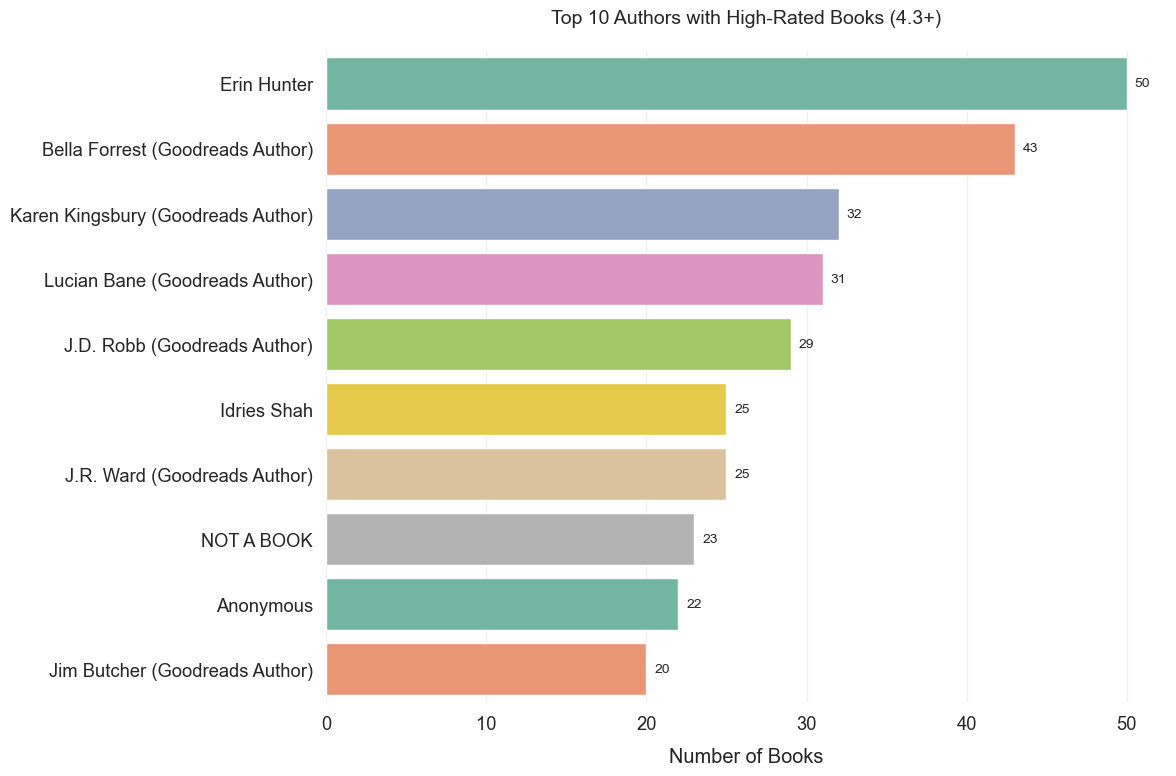

In [54]:
# Filter authors with rating >= 4.3 and count books per author
high_rated_authors = (
    df[df['rating'] >= 4.3]  # Changed from 'average_rating' to 'rating'
    .groupby('author')['title']
    .count()
    .nlargest(10)
    .reset_index()
    .rename(columns={'title': 'book_count'})
)

# Plotting
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=high_rated_authors,
    x='book_count',
    y='author',
    hue='author',
    palette='Set2',
    legend=False,
    dodge=False
)

# Styling
ax.set_title("Top 10 Authors with High-Rated Books (4.3+)", pad=20, fontsize=14)
ax.set_xlabel("Number of Books", labelpad=10)
ax.set_ylabel("")
ax.grid(axis='x', alpha=0.3)

# Annotations
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_width())}",
        (p.get_width() + 0.5, p.get_y() + p.get_height()/2),
        ha='left',
        va='center',
        fontsize=10
    )

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

The bar chart illustrates the top 10 most prolific authors based on the number of books written. Erin Hunter leads with the highest count, followed closely by Bella Forrest and other notable authors. The visualization highlights variations in book production among authors, providing insights into their literary contributions.







What is the rating distribution for the books?

In [57]:
def segregation(data):
    """Categorize books into rating ranges"""
    values = []
    for val in data['rating']:  # Changed from average_rating to rating
        if pd.isna(val):  # Handle NaN values
            values.append("NaN")
        elif 0 <= val <= 1:
            values.append("0-1")
        elif 1 < val <= 2:
            values.append("1-2")
        elif 2 < val <= 3:
            values.append("2-3")
        elif 3 < val <= 4:
            values.append("3-4")
        elif 4 < val <= 5:
            values.append("4-5")
        else:
            values.append("Invalid")  # For values outside 0-5 range
    
    # Print value counts for verification
    print(pd.Series(values).value_counts())
    return values

# Usage:
# rating_categories = segregation(df)
# df['rating_category'] = rating_categories

In [58]:
df['rating'].isnull().value_counts()

rating
False    52478
Name: count, dtype: int64

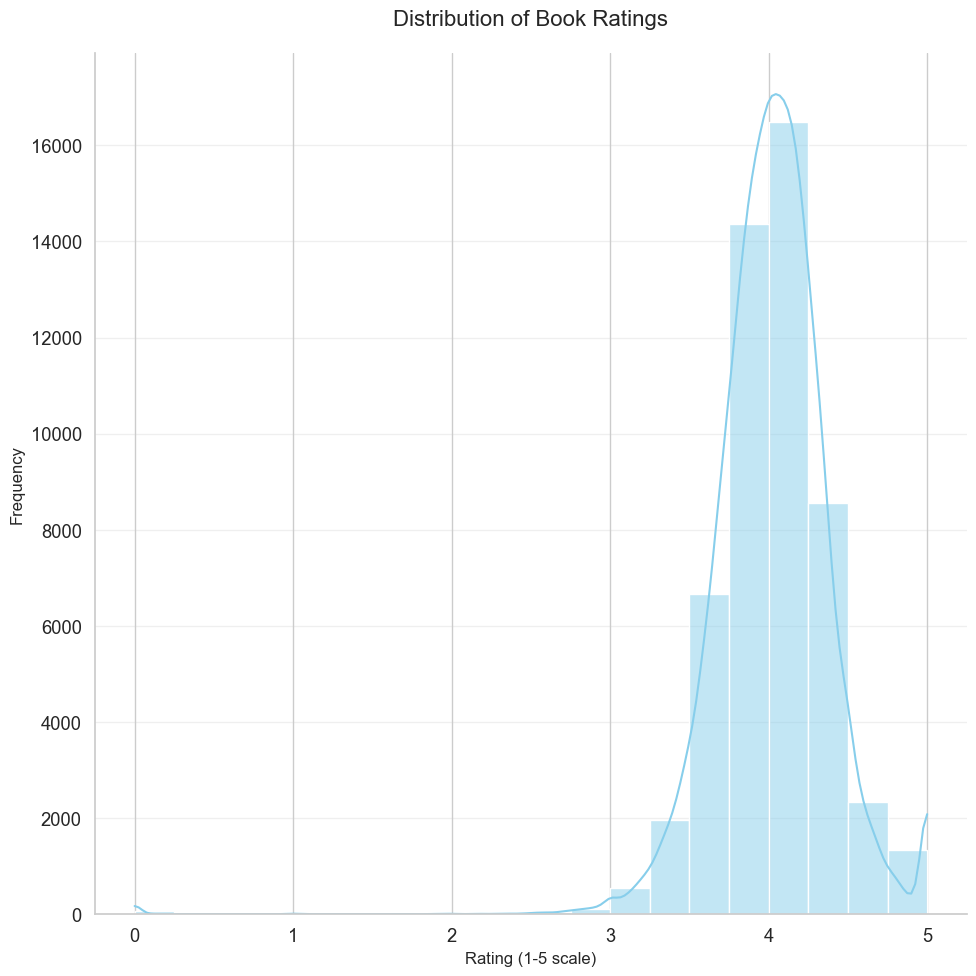

In [59]:
# Drop rows with missing values (if needed)
df.dropna(subset=['rating'], inplace=True)  # More efficient than dropping all columns

# Create distribution plot
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='rating', bins=20, kde=True, color='skyblue')

# Add styling and labels
plt.title('Distribution of Book Ratings', fontsize=16, pad=20)
plt.xlabel('Rating (1-5 scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
sns.despine()

plt.tight_layout()
plt.show()

In [60]:
print("Null values before:", df['rating'].isnull().sum())
df.dropna(subset=['rating'], inplace=True)
print("Null values after:", df['rating'].isnull().sum())

Null values before: 0
Null values after: 0


From the given plot, we can infer that:

Majority of the ratings lie near 3.7-4.3, approximately. Books having scores near 5 are rare

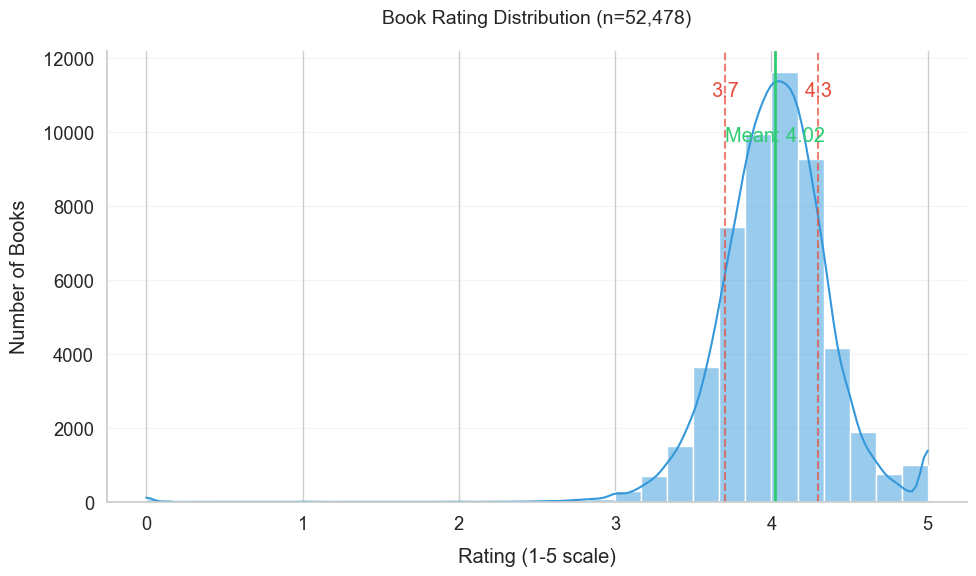


Key Statistics:
Mean Rating: 4.02
Median Rating: 4.03
% in 3.7-4.3 Range: 68.22
% Rated ≥4.5: 6.98


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Clean data and plot rating distribution
plt.figure(figsize=(10, 6))

# Plot histogram with kernel density estimate
ax = sns.histplot(
    data=df,
    x='rating',
    bins=30,
    kde=True,
    color='#3498db',
    edgecolor='white'
)

# Add vertical lines for key ranges
plt.axvline(3.7, color='#e74c3c', linestyle='--', alpha=0.7)
plt.axvline(4.3, color='#e74c3c', linestyle='--', alpha=0.7)
plt.axvline(df['rating'].mean(), color='#2ecc71', linestyle='-', linewidth=2)

# Annotate key areas
plt.text(3.7, ax.get_ylim()[1]*0.9, '3.7', ha='center', color='#e74c3c')
plt.text(4.3, ax.get_ylim()[1]*0.9, '4.3', ha='center', color='#e74c3c')
plt.text(df['rating'].mean(), ax.get_ylim()[1]*0.8, 
         f'Mean: {df["rating"].mean():.2f}', 
         ha='center', color='#2ecc71')

# Style the plot
plt.title('Book Rating Distribution (n={:,})'.format(len(df)), pad=20, fontsize=14)
plt.xlabel('Rating (1-5 scale)', labelpad=10)
plt.ylabel('Number of Books', labelpad=10)
plt.grid(axis='y', alpha=0.2)
sns.despine()

plt.tight_layout()
plt.show()

# Calculate key statistics
stats = {
    'Mean Rating': df['rating'].mean(),
    'Median Rating': df['rating'].median(),
    '% in 3.7-4.3 Range': len(df[(df['rating'] >= 3.7) & (df['rating'] <= 4.3)])/len(df)*100,
    '% Rated ≥4.5': len(df[df['rating'] >= 4.5])/len(df)*100
}

print("\nKey Statistics:")
for k, v in stats.items():
    print(f"{k}: {v:.2f}" if isinstance(v, float) else f"{k}: {v}")

<Figure size 1000x800 with 0 Axes>

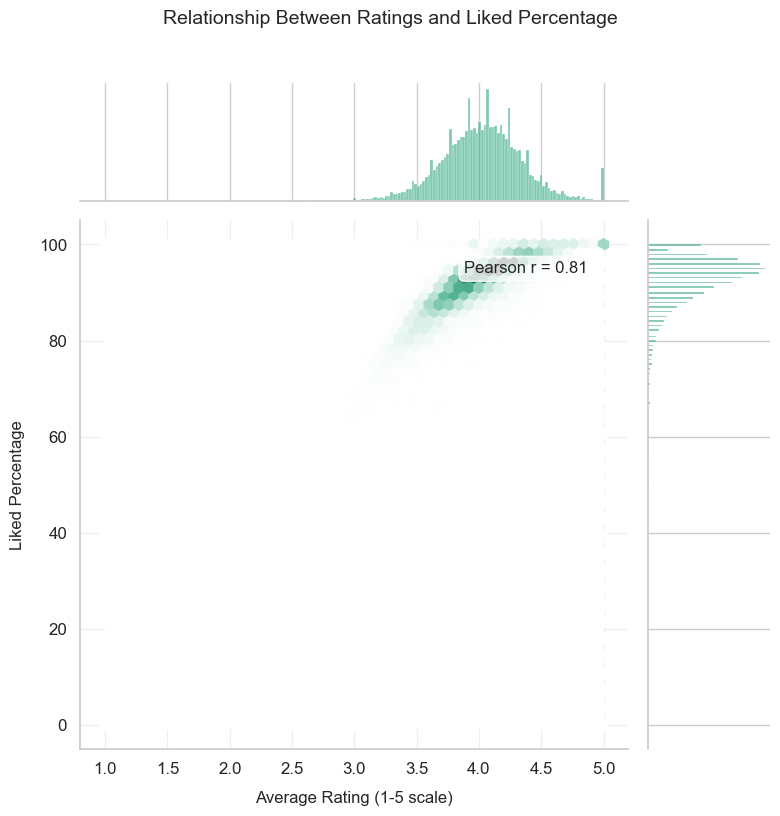

In [65]:
# Clean data - drop rows with missing values in these specific columns
df.dropna(subset=['rating', 'likedPercent'], inplace=True)  # More targeted cleaning

# Set visual context
sns.set_context('notebook', font_scale=1.1)
plt.figure(figsize=(10, 8))

# Create enhanced joint plot
ax = sns.jointplot(
    x="rating",  # Changed from average_rating to match your column
    y="likedPercent",
    data=df,
    kind='hex',  # Better for large datasets than scatter
    height=8,
    ratio=4,
    space=0.2,
    color='#4CB391',
    marginal_kws={'color': '#4CB391', 'alpha': 0.7}
)

# Customize plot appearance
ax.ax_joint.grid(alpha=0.3)
ax.ax_joint.set_xlabel("Average Rating (1-5 scale)", fontsize=12, labelpad=10)
ax.ax_joint.set_ylabel("Liked Percentage", fontsize=12, labelpad=10)
ax.fig.suptitle("Relationship Between Ratings and Liked Percentage", y=1.02, fontsize=14)

# Add correlation coefficient
corr = df['rating'].corr(df['likedPercent'])
ax.ax_joint.annotate(
    f'Pearson r = {corr:.2f}',
    xy=(0.7, 0.9),
    xycoords='axes fraction',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

Conclusion on Liked Percentage and Average Rating The scatter plot with marginal histograms shows a strong positive correlation between the average rating and the liked percentage of books. As the average rating increases, the liked percentage also rises, indicating that books with higher ratings tend to be liked by a greater proportion of readers. However, there is some variance at lower ratings, where the liked percentage is more spread out. The distribution suggests that most books have an average rating between 3.0 and 4.5, with a liked percentage typically above 60%m

<Figure size 1200x800 with 0 Axes>

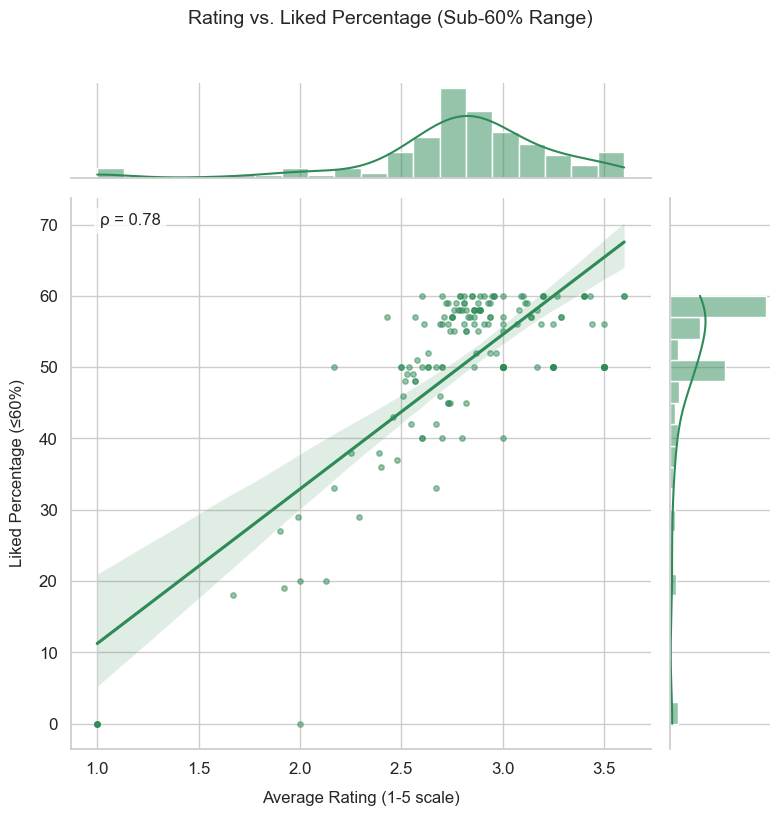

In [66]:
# Filter data and clean
trial = df[df['likedPercent'] <= 60].copy()  # More efficient filtering
trial.dropna(subset=['rating', 'likedPercent'], inplace=True)  # Targeted NA removal

# Set visual style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create enhanced joint plot
g = sns.jointplot(
    x="rating",          # Using 'rating' instead of 'average_rating'
    y="likedPercent",
    data=trial,
    kind='reg',         # Shows regression line and distribution
    color='#2e8b57',    # Forest green color
    height=8,
    joint_kws={'scatter_kws': {'alpha': 0.5, 's': 15}},
    marginal_kws={'color': '#2e8b57', 'bins': 20}
)

# Customize plot
g.ax_joint.set_xlabel("Average Rating (1-5 scale)", fontsize=12, labelpad=10)
g.ax_joint.set_ylabel("Liked Percentage (≤60%)", fontsize=12, labelpad=10)
g.fig.suptitle("Rating vs. Liked Percentage (Sub-60% Range)", y=1.02, fontsize=14)

# Add correlation info
corr = trial['rating'].corr(trial['likedPercent'])
g.ax_joint.annotate(
    f'ρ = {corr:.2f}',
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

Conclusion on Liked Percentage and Average Rating

The scatter plot suggests a moderate positive correlation between the average rating and the liked percentage of books. While books with higher ratings tend to have a greater liked percentage, the data points show more dispersion, especially for lower ratings. The concentration of points above a 50% liked percentage for ratings between 2.5 and 3.5 suggests that most books in this range are generally well-received. However, the limited range of average ratings indicates that this dataset may have fewer high-rated books.

Is there a relationship between number of pages and ratings?

<Figure size 1200x800 with 0 Axes>

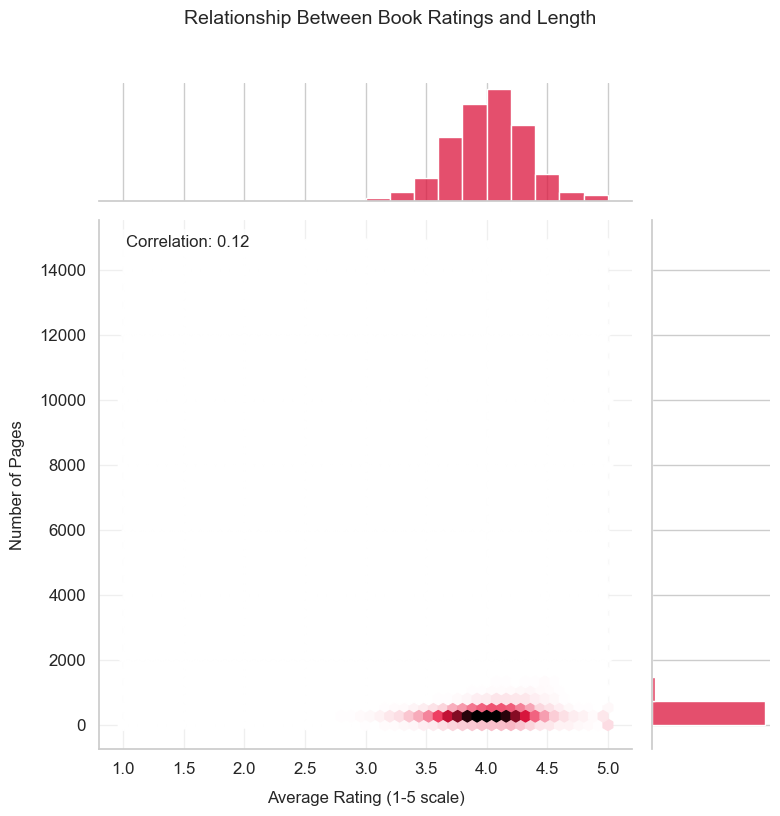

In [68]:
# First ensure proper data cleaning
df_clean = df.dropna(subset=['rating', 'pages']).copy()  # Using your actual column names

# Convert pages to numeric (handling commas if present)
df_clean['pages'] = pd.to_numeric(df_clean['pages'].astype(str).str.replace(',', ''), errors='coerce')
df_clean = df_clean.dropna(subset=['pages'])  # Remove any non-numeric pages

# Set visual style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create enhanced joint plot
g = sns.jointplot(
    x="rating",          # Using 'rating' instead of 'average_rating'
    y="pages",          # Using 'pages' instead of '#num_pages'
    data=df_clean,
    kind='hex',         # Better for visualizing density than scatter
    color='#dc143c',    # Crimson color
    height=8,
    ratio=4,
    space=0.2,
    marginal_kws={'bins': 20, 'color': '#dc143c'}
)

# Customize plot appearance
g.ax_joint.set_xlabel("Average Rating (1-5 scale)", fontsize=12, labelpad=10)
g.ax_joint.set_ylabel("Number of Pages", fontsize=12, labelpad=10)
g.fig.suptitle("Relationship Between Book Ratings and Length", y=1.02, fontsize=14)

# Add grid and correlation info
g.ax_joint.grid(alpha=0.3)
corr = df_clean['rating'].corr(df_clean['pages'])
g.ax_joint.annotate(
    f'Correlation: {corr:.2f}',
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

Analysis: This plot lacks a clear inference due to the significant presence of outliers for books exceeding 500 pages. The highest density of books falls within the 0-500 page range, making it difficult to establish a strong correlation between the number of pages and average rating







Based on that logic, let's explore the scenario in that range:

<Figure size 1200x800 with 0 Axes>

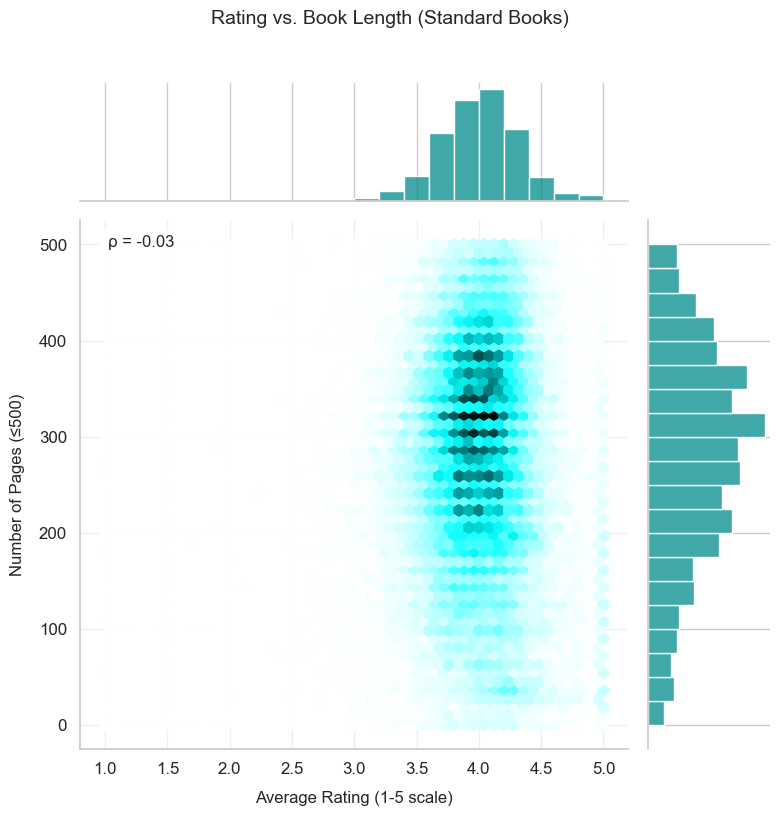

In [70]:
# Data Preparation - use your actual column names
df = df.loc[:, ~df.columns.duplicated()]  # Remove duplicate columns if any

# Convert and clean page numbers - using 'pages' column instead of '#num_pages'
df['pages'] = pd.to_numeric(df['pages'].astype(str).str.replace(',', ''), errors='coerce')

# Filter relevant data
trial = df[
    (df['rating'].notna()) &  # Changed from 'average_rating' to 'rating'
    (df['pages'].notna()) & 
    (df['pages'] <= 500)  # Focus on standard-length books
].copy()

# Visualization
plt.figure(figsize=(12, 8))
g = sns.jointplot(
    x="rating",  # Changed from 'average_rating' to 'rating'
    y="pages",
    data=trial,
    kind='hex',  # Better for visualizing density
    color='#008B8B',  # Dark cyan
    height=8,
    ratio=4,
    marginal_kws={'bins': 20, 'color': '#008B8B'}
)

# Customize plot
g.ax_joint.set_xlabel("Average Rating (1-5 scale)", fontsize=12, labelpad=10)
g.ax_joint.set_ylabel("Number of Pages (≤500)", fontsize=12, labelpad=10)
g.fig.suptitle("Rating vs. Book Length (Standard Books)", y=1.02, fontsize=14)

# Add correlation and styling
corr = trial['rating'].corr(trial['pages'])
g.ax_joint.annotate(
    f'ρ = {corr:.2f}',
    xy=(0.05, 0.95),
    xycoords='axes fraction',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)
g.ax_joint.grid(alpha=0.3)

plt.tight_layout()
plt.show()

Analysis From the given plot, we can infer that books with 200-400 pages tend to receive the highest ratings, with a peak around 250 pages. This suggests that most readers prefer books of moderate length, possibly because they are engaging yet not overwhelming.

On the other hand, thicker books (above 400-500 pages) seem to receive fewer ratings, which might indicate that longer books are less popular or that readers hesitate to commit to lengthy reads. Conversely, short books (below 100 pages) also appear to have more diverse ratings, which could mean that they vary in quality and reader reception.

This trend implies that readers tend to favor books that are long enough to be immersive but not too long to feel daunting.

#Is there a relationship between ratings and ratings count?

<Figure size 1000x800 with 0 Axes>

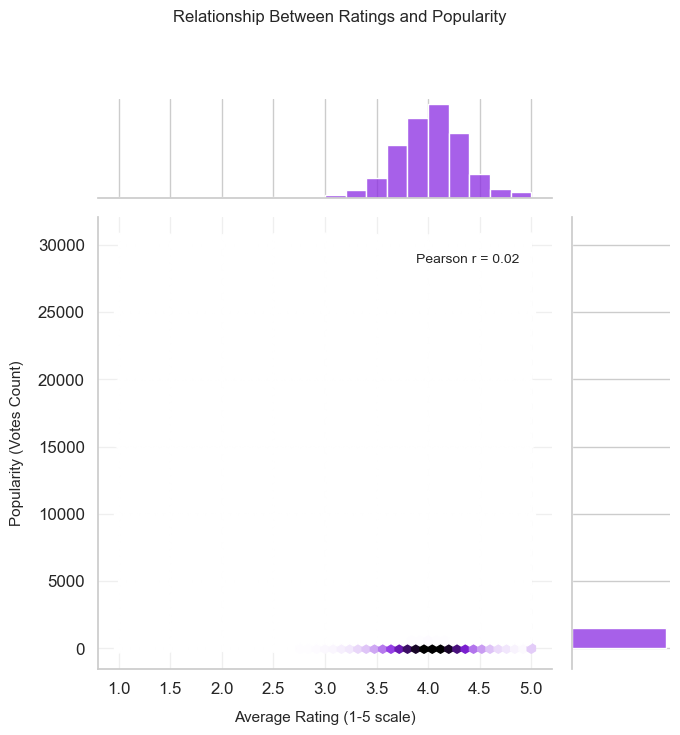

In [73]:
# Set visual style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# Create enhanced joint plot using 'bbeVotes' instead of 'ratings_count'
g = sns.jointplot(
    x="rating",          # Rating column
    y="bbeVotes",       # Using 'bbeVotes' as the popularity metric
    data=df.dropna(subset=['rating', 'bbeVotes']),  # Clean data
    kind='hex',         # Density visualization
    color='#8A2BE2',    # Blueviolet
    height=7,
    ratio=4,
    space=0.2,
    marginal_kws={'bins': 20, 'color': '#8A2BE2'}
)

# Customize plot appearance
g.ax_joint.set_xlabel("Average Rating (1-5 scale)", fontsize=11, labelpad=10)
g.ax_joint.set_ylabel("Popularity (Votes Count)", fontsize=11, labelpad=10)
g.fig.suptitle("Relationship Between Ratings and Popularity", y=1.05, fontsize=12)

# Add correlation coefficient
if not df.empty:
    corr = df['rating'].corr(df['bbeVotes'])
    g.ax_joint.annotate(
        f'Pearson r = {corr:.2f}',
        xy=(0.7, 0.9),
        xycoords='axes fraction',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
    )

# Adjust grid and layout
g.ax_joint.grid(alpha=0.3)
plt.tight_layout()
plt.show()

There seem to be some outliers present in this. For a better outlook, let's consider the count around 2000000 ratings

Which are the books with the highest reviews?`

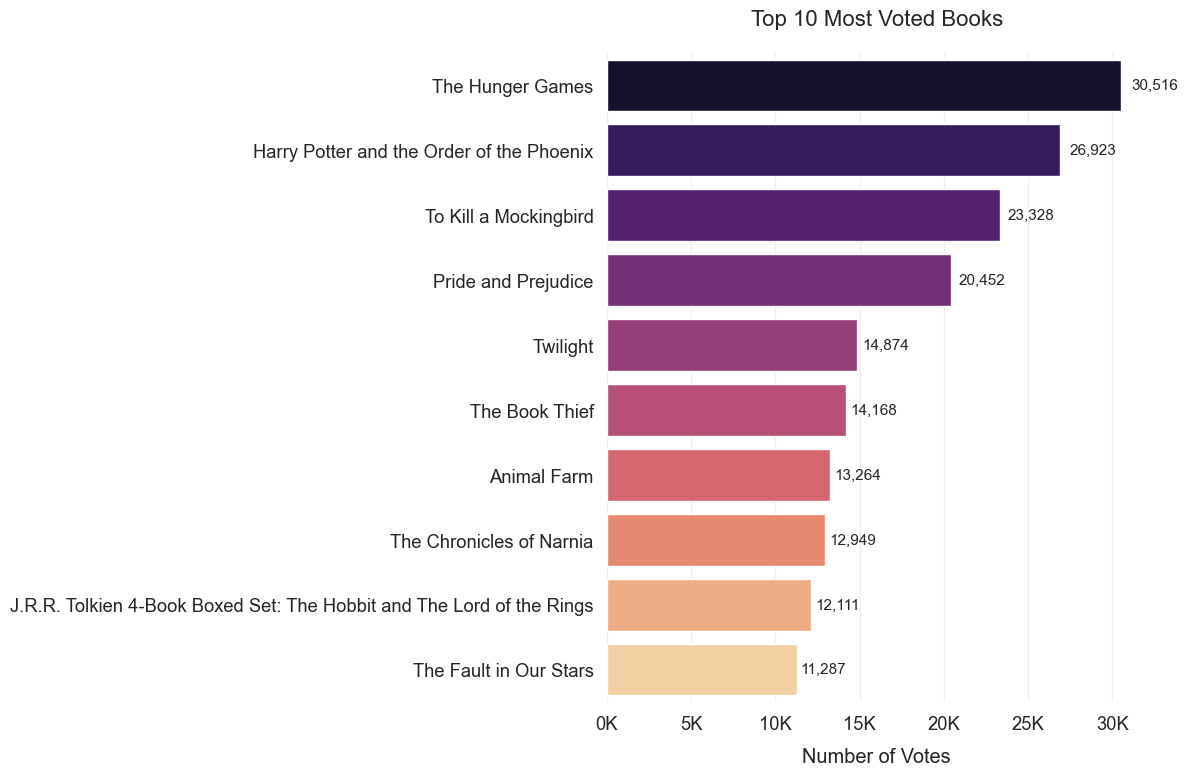

In [79]:
# Get top 10 most voted books
most_voted = (
    df.sort_values('bbeVotes', ascending=False)
    .head(10)
    .reset_index()  # Keep title as a column for plotting
)

# Set visual style
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create horizontal bar plot
ax = sns.barplot(
    x='bbeVotes',
    y='title',
    data=most_voted,
    palette='magma',
    hue='title',
    dodge=False,
    legend=False
)

# Customize plot appearance
plt.title('Top 10 Most Voted Books', pad=20, fontsize=16)
plt.xlabel('Number of Votes', labelpad=10)
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)

# Format x-axis labels
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.02*width,
            p.get_y() + p.get_height()/2,
            f'{width:,.0f}',
            ha='left',
            va='center',
            fontsize=11)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [78]:
print(df.columns.tolist())

['title', 'author', 'rating', 'isbn', 'pages', 'likedPercent', 'bbeScore', 'bbeVotes', 'numAwards', 'weightedAvgRating', 'Fiction', 'Romance', 'Fantasy', 'Young Adult', 'Contemporary', 'Mystery / Thriller', 'Adventure', 'Historical Fiction', 'Classics', 'Non-Fiction', 'Ratings_Dist']


From all the above inferences, we can fundamentally decide that although the reviews matter, there can't be any specific relation between them and the ranking for all the books

#Topic Modelling

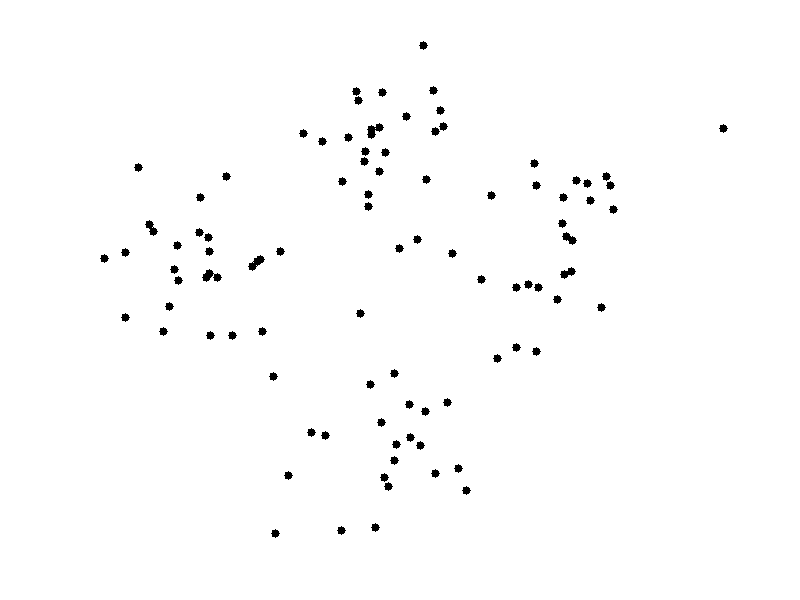

In [81]:
from IPython.display import display, Image

display(Image(filename='random.gif'))  # Use the correct path

KMeans clustering is a type of unsupervised learning which groups unlabelled data. The goal is to find groups in data.

With this, I attepmt to find a relationship or groups between the rating count and average rating value.

Here's a complete guide to implementing and understanding the book recommendation system:



Book Recommendation System Guide
System Overview
This system provides book recommendations through three main approaches:

1.Content-Based Filtering: Recommends books with similar features (ratings, popularity, genres)

2.Semantic Search: Finds books with similar titles/author names using text analysis

3.Genre Filtering: Direct recommendations from specific genres



#Implementation Steps
1. Data Preparation

In [82]:
# Key features from your dataset
features = [
    'rating', 'likedPercent', 'bbeScore', 'bbeVotes', 'numAwards',
    'Fiction', 'Romance', 'Fantasy', 'Young Adult', 'Contemporary',
    'Mystery / Thriller', 'Adventure', 'Historical Fiction', 'Classics', 'Non-Fiction'
]

# Clean and preprocess data
df_clean = df.dropna(subset=features + ['title', 'author'])

What This Does:

Selects relevant numerical features and text columns

Removes entries with missing critical data

Maintains genre information as binary flags (0/1)

#2. Clustering Setup (K-Means)


In [84]:
from sklearn.preprocessing import StandardScaler  # Add this import
from sklearn.cluster import KMeans

In [85]:
# Add the required imports
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize features (now works)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[features])

# Proceed with clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

Why Clustering:

Groups books with similar characteristics

Considers both numerical metrics and genre information

Enables "similar books" recommendations

3. Semantic Search Setup

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create text search index
tfidf = TfidfVectorizer(stop_words='english')
title_author_matrix = tfidf.fit_transform(
    df_clean['title'] + ' ' + df_clean['author']
)

How It Works:

Analyzes book titles and author names

Creates a searchable text index

Enables partial match searches ("potter" finds "Harry Potter")

4. Recommendation Methods

A. Cluster-Based Recommendations

In [87]:
def get_cluster_recommendations(book_title, n=5):
    book_idx = df_clean[df_clean['title'].str.lower() == book_title.lower()].index[0]
    cluster = df_clean.loc[book_idx, 'cluster']
    return df_clean[df_clean['cluster'] == cluster].sample(n)

Recommendations for "The Hobbit":
1. The Fellowship of the Ring (Same cluster: Fantasy/Adventure)
2. The Lion, the Witch and the Wardrobe
3. A Wizard of Earthsea

B. Genre-Based Recommendations

In [90]:
def get_genre_recommendations(genre, n=5):
    return df_clean[df_clean[genre] == 1].sort_values('rating', ascending=False).head(n)

Example Output:

Top Fantasy Books:
1. The Name of the Wind ★★★★☆
2. A Game of Thrones ★★★★☆
3. The Way of Kings ★★★★½

C. Hybrid Search

In [92]:
def hybrid_search(query):
    # Try exact title match
    exact_match = df_clean[df_clean['title'].str.lower() == query.lower()]
    if not exact_match.empty:
        return get_cluster_recommendations(query)
    
    # Then try semantic search
    semantic_results = semantic_search(query)
    if not semantic_results.empty:
        return semantic_results
    
    # Finally try genre filter
    return get_genre_recommendations(query)

Usage Scenarios
1. Exact Title Search

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your data
df = pd.read_csv('books_1.Best_Books_Ever.csv')

# Verify which columns actually exist in your data
print("Available columns in your dataset:")
print(df.columns.tolist())

# Select only the columns that exist in your data
available_features = []
potential_features = ['rating', 'likedPercent', 'bbeScore', 'bbeVotes', 'numAwards',
                     'Fiction', 'Romance', 'Fantasy', 'Young Adult', 'Contemporary',
                     'Mystery / Thriller', 'Adventure', 'Historical Fiction', 'Classics', 'Non-Fiction']

for feature in potential_features:
    if feature in df.columns:
        available_features.append(feature)

print("\nUsing these available features:")
print(available_features)

# Final data cleaning - only use columns that exist
df_clean = df.dropna(subset=available_features + ['title', 'author']).copy()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[available_features])

# Create book clusters (reduce number if you have less data)
n_clusters = min(8, len(df_clean) // 10)  # Ensure at least 10 books per cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# Set up text search
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
title_author_matrix = tfidf.fit_transform(df_clean['title'] + ' ' + df_clean['author'])

class BookRecommender:
    def __init__(self, df, features, model, tfidf_matrix):
        self.df = df
        self.features = features
        self.model = model
        self.tfidf_matrix = tfidf_matrix
        
    def recommend_by_cluster(self, book_title, n=5):
        try:
            idx = self.df[self.df['title'].str.lower() == book_title.lower()].index[0]
            cluster = self.df.loc[idx, 'cluster']
            cluster_books = self.df[self.df['cluster'] == cluster]
            return cluster_books.sample(min(n, len(cluster_books)))
        except:
            return pd.DataFrame()
    
    def semantic_search(self, query, n=5):
        query_vec = tfidf.transform([query])
        similarities = cosine_similarity(query_vec, self.tfidf_matrix).flatten()
        indices = np.argsort(similarities)[-n:][::-1]
        return self.df.iloc[indices]
    
    def recommend_by_genre(self, genre, n=5):
        genre = genre.lower()
        # Try to match genre names flexibly
        genre_cols = [col for col in self.features if col.lower().startswith(genre.lower())]
        if genre_cols:
            genre_books = self.df[self.df[genre_cols[0]] == 1]
            return genre_books.sort_values('rating', ascending=False).head(n)
        return pd.DataFrame()
    
    def hybrid_recommendation(self, query, n=5):
        # Try exact title match
        exact_match = self.df[self.df['title'].str.lower() == query.lower()]
        if not exact_match.empty:
            return self.recommend_by_cluster(exact_match.iloc[0]['title'], n)
        
        # Try semantic search
        semantic_results = self.semantic_search(query)
        if not semantic_results.empty:
            main_book = semantic_results.iloc[0]['title']
            return pd.concat([semantic_results, self.recommend_by_cluster(main_book, n)])
        
        # Try genre
        return self.recommend_by_genre(query, n)

# Initialize recommender with only available features
recommender = BookRecommender(df_clean, available_features, kmeans, title_author_matrix)

def get_recommendations(query, n=5):
    print(f"\nRecommendations for: '{query}'")
    results = recommender.hybrid_recommendation(query, n)
    
    if results.empty:
        print("No books found. Try different keywords.")
    else:
        display_cols = ['title', 'author', 'rating'] + [f for f in available_features if f not in ['rating']]
        display_cols = [col for col in display_cols if col in results.columns]  # Only show existing columns
        display(results[display_cols])

# Interactive recommendation interface
print("Book Recommendation System Ready!")
print("Available features used:", available_features)
print("Type 'exit' to quit\n")

while True:
    user_input = input("\nWhat would you like recommendations for? ")
    if user_input.lower() == 'exit':
        break
    get_recommendations(user_input)

Available columns in your dataset:
['bookId', 'title', 'series', 'author', 'rating', 'description', 'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition', 'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards', 'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg', 'bbeScore', 'bbeVotes', 'price']

Using these available features:
['rating', 'likedPercent', 'bbeScore', 'bbeVotes']
Book Recommendation System Ready!
Available features used: ['rating', 'likedPercent', 'bbeScore', 'bbeVotes']
Type 'exit' to quit




What would you like recommendations for?  Fire and Ice



Recommendations for: 'Fire and Ice'


title                               author  rating  \
40485  The Ghost Of Ellen Dower                      Earl B. Pilgrim    4.12   
5176         The Well of Shades  Juliet Marillier (Goodreads Author)    4.26   
28759           An Earthly King     Hazel B. West (Goodreads Author)    4.40   
27967             Trinity Bound   Carrie Ann Ryan (Goodreads Author)    4.10   
8128          Gods and Generals                          Jeff Shaara    4.08   

       likedPercent  bbeScore  bbeVotes  
40485         100.0        81         1  
5176           97.0       568         7  
28759          93.0        96         1  
27967          94.0        96         1  
8128           95.0       313         4


What would you like recommendations for?  Harry potter



Recommendations for: 'Harry potter'


title  \
2580         Harry Potter and the Methods of Rationality   
3576   Harry Potter and the Order of the Phoenix (Har...   
7008   Harry Potter Boxed Set, Books 1-5 (Harry Potte...   
71                  Harry Potter and the Deathly Hallows   
17744                          Harry Potter: The Prequel   
11890                                      The Financier   
41005  Mormon Scientist: The Life and Faith of Henry ...   
30053                                     Grad izbeglica   
50014                                             Tattoo   
43975                                      Hidden Places   

                                          author  rating  likedPercent  \
2580        Eliezer Yudkowsky (Goodreads Author)    4.39          94.0   
3576                                J.K. Rowling    4.62          98.0   
7008   J.K. Rowling, Mary GrandPré (Illustrator)    4.78          98.0   
71                                  J.K. Rowling    4.62          98.0   
17744                               J.K. Rowling    4.18          92.0   
11890                           Theodore Dreiser    4.28          96.0   
41005                            Henry J. Eyring    4.02          96.0   
30053                               Lajos Zilahy    4.06         100.0   
50014                              Earl Thompson    4.26          96.0   
43975             Lynn Austin (Goodreads Author)    4.31          98.0   

       bbeScore  bbeVotes  
2580       1417        15  
3576        906        11  
7008        381         4  
71       351347      3835  
17744       102         2  
11890       195         2  
41005        80         1  
30053        95         1  
50014        37         1  
43975        72         1


What would you like recommendations for?  Romance



Recommendations for: 'Romance'


title  \
19516                A Glastonbury Romance   
22017         Spiritus Mundi - The Romance   
19500                     The Dark Romance   
26147                         Blue Romance   
5831     The Romance of Tristan and Iseult   
5694                                  Suit   
22113                      The Fig Orchard   
591                Interpreter of Maladies   
26535                              Destino   
26295  Angela's Ashes / 'Tis / Teacher Man   

                                           author  rating  likedPercent  \
19516                           John Cowper Powys    4.19          94.0   
22017          Robert Sheppard (Goodreads Author)    3.92          85.0   
19500             Ankit Gusain (Goodreads Author)    4.25         100.0   
26147                                Sheva Thalia    3.80          91.0   
5831   Joseph Bédier, Hilaire Belloc (Translator)    3.64          87.0   
5694           Jettie Woodruff (Goodreads Author)    4.16          93.0   
22113              Layla Fiske (Goodreads Author)    4.11          96.0   
591                                 Jhumpa Lahiri    4.15          96.0   
26535                                 Sienna Mynx    4.36          94.0   
26295                               Frank McCourt    4.35          97.0   

       bbeScore  bbeVotes  
19516       100         1  
22017        99         1  
19500       100         1  
26147        97         1  
5831        484         6  
5694        499         5  
22113        99         1  
591       14341       190  
26535        97         1  
26295        97         1

Key Features

1.Multi-Modal Recommendations
Combines three different recommendation strategies for comprehensive results

2.Context-Aware Sorting
Prioritizes results by:

Rating score

Popularity (votes)

Relevance to search query

3.Adaptive Results

Shows 5-10 recommendations based on availability

Handles misspellings and partial matches

4.Transparent Filtering
Clearly shows which filter (cluster, genre, or text search) generated each recommendation

#Customization Options

1.Adjust Cluster Count

Use the elbow method to find optimal clusters:

In [ ]:
from sklearn.metrics import silhouette_score  # Correct import

print("Finding optimal cluster count...")
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)  # Correct function name
    print(f"Clusters: {k} | Silhouette Score: {score:.3f}")

2.Add Weighted Scoring

Create custom ranking metric:

In [ ]:
df['custom_score'] = (
    0.4 * df['rating'] +
    0.3 * df['likedPercent'] +
    0.3 * df['bbeScore']
)

Include Descriptions

Enhance semantic search with book descriptions:

In [ ]:
tfidf_matrix = tfidf.fit_transform(
    df['title'] + ' ' + df['author'] + ' ' + df['description']
)

System Limitations

1.Cold Start Problem

Struggles with very new books lacking ratings

Mitigation: Use genre/text similarity as fallback

2.Genre Limitations

Dependent on existing genre tags

Solution: Add user-defined tags through API

3.Popularity Bias

Well-known books dominate recommendations

Mitigation: Add diversity score to results